In [1]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 9,6

# импортируем нужные библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel('Prices1.xlsx')
data.tail()

,import_mmvb_prices_id,load_file_history_id,board_id,board_name,trade_date,short_name,security_id,type,reg_number,face_value,...,mp2_val_trd,admitted_value,market_price3,mp3_val_trd,close_auction,price_type,last_price,acc_int_face,face_unit,Date_file
50616,3520,1152149,TQTF,Т+ ETF,30.04.2020,VTBE ETF,VTBE,ип,3755,0.0,...,2786973.45,0,662.1000,2786973.45,0.0,CASH,655.1000,0.0,USD,30.04.2020
50617,3521,1152149,TQTF,Т+ ETF,30.04.2020,VTBH ETF,VTBH,ип,3754,0.0,...,939519.86,0,710.7000,939519.86,0.0,CASH,713.5000,0.0,USD,30.04.2020
50618,3522,1152149,TQTF,Т+ ETF,30.04.2020,VTBM ETF,VTBM,ип,3915,0.0,...,28842241.95,0,1.0154,28842241.95,0.0,CASH,1.0156,0.0,RUR,30.04.2020
50619,3523,1152149,TQTF,Т+ ETF,30.04.2020,VTBU ETF,VTBU,ип,3906,0.0,...,1208331.72,0,3764.5000,1208331.72,0.0,CASH,3808.0000,0.0,USD,30.04.2020
50620,3524,1152149,TQTF,Т+ ETF,30.04.2020,VTBX ETF,VTBX,ип,3965,0.0,...,8218847.75,0,96.0000,8218847.75,0.0,CASH,95.6000,0.0,RUR,30.04.2020


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50621 entries, 0 to 50620
Data columns (total 60 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   import_mmvb_prices_id   50621 non-null  int64  
 1   load_file_history_id    50621 non-null  int64  
 2   board_id                50621 non-null  object 
 3   board_name              50621 non-null  object 
 4   trade_date              50621 non-null  object 
 5   short_name              50621 non-null  object 
 6   security_id             50621 non-null  object 
 7   type                    50621 non-null  object 
 8   reg_number              46293 non-null  object 
 9   face_value              50621 non-null  float64
 10  volume                  50621 non-null  int64  
 11  value                   50621 non-null  float64
 12  currency_id             50621 non-null  object 
 13  open_period             50621 non-null  float64
 14  open                    50621 non-null

In [16]:
data_new = data[['trade_date', 'short_name', 'type', 'low', 'high', 'market_price3', 'num_trades', 'duration', 'mat_date', 'issue_size', 'yield_close']]
data_new.tail()

,trade_date,short_name,type,low,high,market_price3,num_trades,duration,mat_date,issue_size,yield_close
50616,30.04.2020,VTBE ETF,ип,645.1000,660.0000,662.1000,182,0,NaN,0,0.0
50617,30.04.2020,VTBH ETF,ип,700.9000,713.5000,710.7000,56,0,NaN,0,0.0
50618,30.04.2020,VTBM ETF,ип,1.0151,1.0156,1.0154,595,0,NaN,0,0.0
50619,30.04.2020,VTBU ETF,ип,3731.0000,3820.0000,3764.5000,32,0,NaN,0,0.0
50620,30.04.2020,VTBX ETF,ип,94.7000,97.6500,96.0000,763,0,NaN,0,0.0


In [17]:
dynamic = data_new.groupby('trade_date', as_index=False).sum().sort_values('num_trades', ascending=False).head(15)
dynamic

,trade_date,low,high,market_price3,num_trades,duration,issue_size,yield_close
1,02.04.2020,618481.3560,638467.0899,921687.3906,1674665,790736,28089720195665,13730.2987
4,07.04.2020,693035.6289,722306.5369,954186.0579,1651741,791775,28089703873706,11621.7777
6,09.04.2020,724253.7287,747064.4790,963656.2699,1580962,811697,28090130494710,11934.5426
14,21.04.2020,633452.5842,663779.4870,963400.5693,1578573,823080,28090141954251,12713.1447
10,15.04.2020,692439.3917,724126.3050,951052.6176,1571709,806250,28090798130236,11750.3807
11,16.04.2020,775358.2907,806967.6962,978404.2293,1517510,802924,28090111130236,12183.5035
15,22.04.2020,648374.7689,670050.1203,968396.5100,1486262,817915,28090120221256,12624.0199
2,03.04.2020,661936.2821,684869.5610,928947.9082,1483370,798149,28089707373706,14024.8907
21,30.04.2020,772222.0802,792296.3750,978290.9161,1413245,843164,28090197663550,10011.1065
19,28.04.2020,746223.6591,762788.2943,977661.2542,1348824,815269,28090156500239,10121.3574


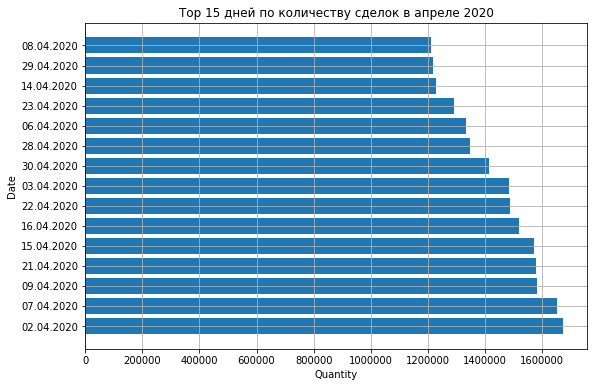

In [18]:
#ГРАФИК1
plt.barh(dynamic['trade_date'], dynamic['num_trades'])
plt.xlabel('Quantity')
plt.ylabel('Date')
plt.title('Top 15 дней по количеству сделок в апреле 2020')
plt.grid()

ГРАФИК1 показывает, в какие дни в апреле совершалось больше всего сделок с ценными бумагами на Московской бирже
Такой тип графика позволяет наглядно увидеть в отсортированном виде даты и максимальные значения.

In [20]:
dynamic_security = data_new.groupby('short_name', as_index=False).sum().sort_values('num_trades', ascending=False).head(15)
dynamic_security

,short_name,low,high,market_price3,num_trades,duration,issue_size,yield_close
1956,Сбербанк,4170.8900,4285.5700,4230.010,2173262,0,474912856000,0.0
521,ГАЗПРОМ ао,4079.0000,4196.6300,4138.230,1632860,0,520817283800,0.0
928,ЛУКОЙЛ,104047.5000,109234.5000,106648.500,1562752,0,15243046764,0.0
1567,Роснефть,7077.0500,7432.7000,7242.050,1244894,0,233159911974,0.0
432,ВТБ ао,0.7398,0.7645,0.753,1177946,0,285131909421436,0.0
2076,Татнфт 3ао,11748.3000,12414.7000,12080.200,1073384,0,47931195400,0.0
1099,МосБиржа,2351.9500,2441.8800,2401.040,827668,0,50080832076,0.0
312,Аэрофлот,1600.9400,1660.7400,1632.060,789065,0,24433558578,0.0
1957,Сбербанк-п,3830.4200,3928.6700,3883.670,784041,0,22000000000,0.0
244,АЛРОСА ао,1357.3800,1410.8800,1381.310,730612,0,162029243860,0.0


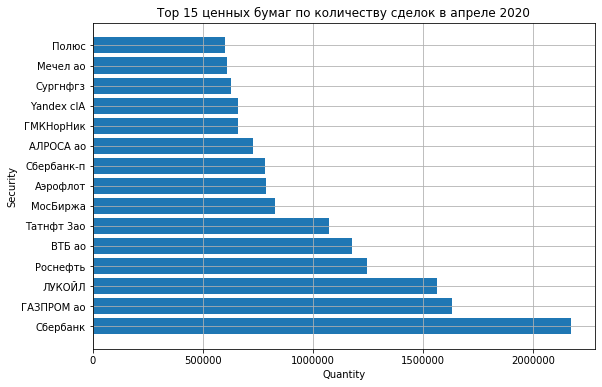

In [21]:
#ГРАФИК2
plt.barh(dynamic_security['short_name'], dynamic_security['num_trades'])
plt.xlabel('Quantity')
plt.ylabel('Security')
plt.title('Top 15 ценных бумаг по количеству сделок в апреле 2020')
plt.grid()

ГРАФИК2 показывает, с какими ценными бумагами в апреле совершалось больше всего сделок на бирже.
Аналогично в данном случае такой тип позволяет наглядно и в отсортированном виде увидеть данные.

In [22]:
dynamic_security2 = data_new[['trade_date', 'short_name', 'num_trades']]
prices = dynamic_security2[((dynamic_security2['short_name']=='Сбербанк') | (dynamic_security2['short_name']=='ГАЗПРОМ ао') | (dynamic_security2['short_name']=='ЛУКОЙЛ') | (dynamic_security2['short_name']=='Роснефть') | (dynamic_security2['short_name']=='ВТБ ао'))]
prices_dynamics = prices.groupby(['trade_date','short_name']).sum()
prices_dynamics.head(10)

num_trades
trade_date short_name            
01.04.2020 ВТБ ао           46846
           ГАЗПРОМ ао       53547
           ЛУКОЙЛ           49996
           Роснефть         54461
           Сбербанк         82314
02.04.2020 ВТБ ао           58962
           ГАЗПРОМ ао      109634
           ЛУКОЙЛ          112519
           Роснефть        111063
           Сбербанк        138344

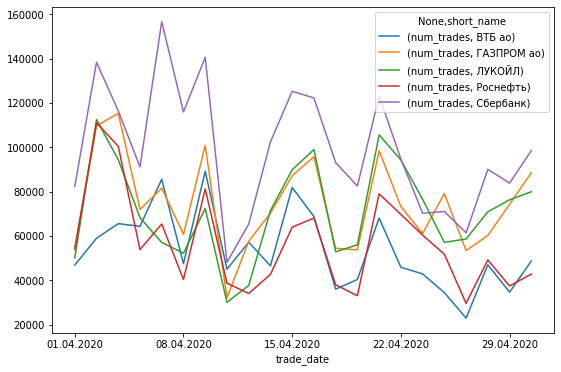

In [23]:
#ГРАФИК3
prices_dynamics.unstack('short_name').plot()

ГРАФИК3 показывает динамику количества сделок в апреле с ценными бумагами из Топ-5 по количеству сделок.
Такой тип графика позволяет увидеть зависимость между ценными бумагами; несмотря на различное количество сделок у разных ценных бумаг
тенденция по их увеличению / уменьшению в определенные дни видна на графике.

In [24]:
type_security = data_new[['trade_date', 'type', 'num_trades']]
type_security2 = type_security.groupby(['trade_date','type']).sum()
type_security2

num_trades
trade_date type            
01.04.2020 ао        990417
           ап         88172
           др         42111
           ип          7488
           ис             0
...                     ...
30.04.2020 др         36523
           ип         26519
           ис             0
           иф         24784
           об         45071

[154 rows x 1 columns]

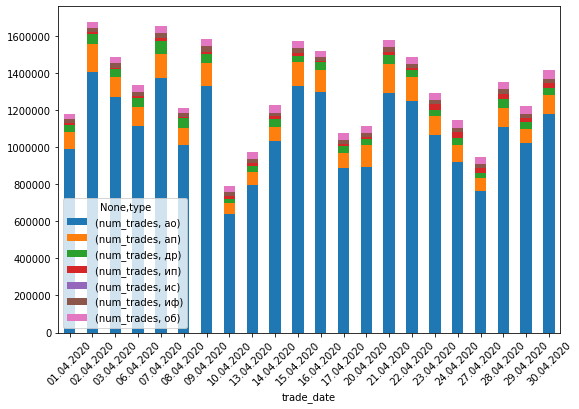

In [12]:
#ГРАФИК4
type_security2.unstack('type').plot(kind='bar', rot=45, stacked=True)

ГРАФИК4 показывает количество сделок с определенным типом ценных бумаг (акции, облигации, паи и т.п.) в течение апреля.
Такой тип графика позволяет увидеть соотношение по количеству сделок между различными типами ценных бумаг, и что пропорция практически не меняется.

In [25]:
prices_security = data_new[['trade_date', 'short_name', 'market_price3']]
prices2 = prices_security[(prices_security['short_name']=='Сбербанк')]
prices2_dynamics = prices2.groupby(['trade_date','short_name']).sum()
prices2_dynamics.head()


,,market_price3
trade_date,short_name,
01.04.2020,Сбербанк,184.21
02.04.2020,Сбербанк,186.02
03.04.2020,Сбербанк,185.60
06.04.2020,Сбербанк,188.83
07.04.2020,Сбербанк,197.47


In [26]:
prices_security = data_new[['trade_date', 'short_name', 'market_price3']]
prices3 = prices_security[(prices_security['short_name']=='ГАЗПРОМ ао')]
prices3_dynamics = prices3.groupby(['trade_date','short_name']).sum()
prices4 = prices_security[(prices_security['short_name']=='ЛУКОЙЛ')]
prices4_dynamics = prices4.groupby(['trade_date','short_name']).sum()

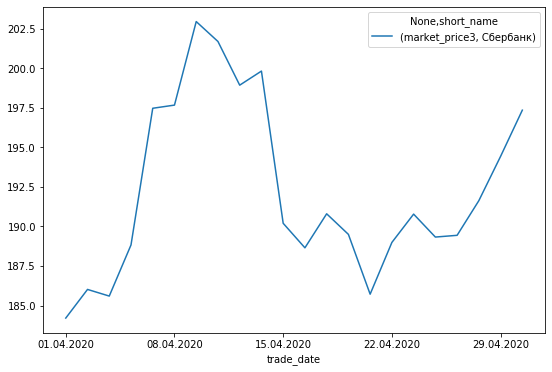

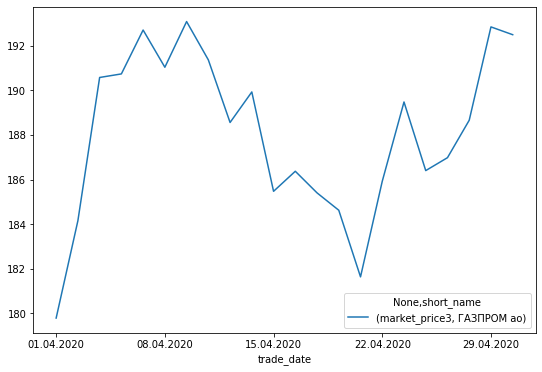

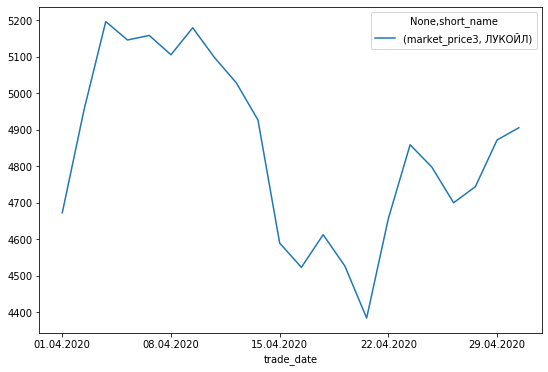

In [27]:
#ГРАФИКИ5
prices2_dynamics.unstack('short_name').plot()
prices3_dynamics.unstack('short_name').plot()
prices4_dynamics.unstack('short_name').plot()

ГРАФИКИ5 показывают динамику рыночных цен в апреле отдельно по ценным бумагам, входящим в Топ-3 по количеству сделок.
Совместить все три ценные бумаги в одном графике невозможно из-за большой разницы в котировках по каждой ценной бумаге (поскольку зависит от номинальной стоимости).
Такой тип графика всегда позволяет увидеть и сравнить динамику роста / снижения по датам и найти зависимость.

In [28]:
new_prices_security = data_new[['trade_date', 'short_name', 'market_price3', 'num_trades']]
new_prices = new_prices_security[((new_prices_security['short_name']=='Сбербанк') | (new_prices_security['short_name']=='ГАЗПРОМ ао') | (new_prices_security['short_name']=='ЛУКОЙЛ') | (new_prices_security['short_name']=='Роснефть') | (new_prices_security['short_name']=='ВТБ ао'))]
new_prices_dynamics = new_prices.groupby(['trade_date','short_name']).sum()
new_prices_dynamics.head(10)

market_price3  num_trades
trade_date short_name                           
01.04.2020 ВТБ ао             0.0320       46846
           ГАЗПРОМ ао       179.7800       53547
           ЛУКОЙЛ          4673.0000       49996
           Роснефть         315.1500       54461
           Сбербанк         184.2100       82314
02.04.2020 ВТБ ао             0.0321       58962
           ГАЗПРОМ ао       184.1500      109634
           ЛУКОЙЛ          4955.0000      112519
           Роснефть         337.5000      111063
           Сбербанк         186.0200      138344

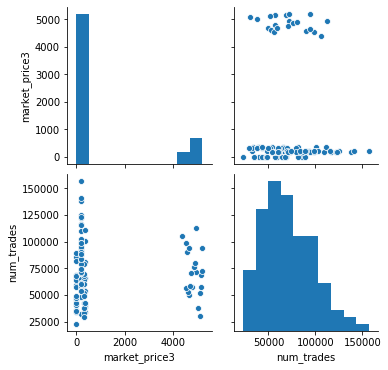

In [29]:
#ГРАФИК6
sns_plot = sns.pairplot(new_prices_dynamics[['market_price3', 'num_trades']])
sns_plot

ГРАФИК6 позволяет посмотреть, какая взаимосвязь есть между рыночной ценой ценных бумаг из Топ-5 по количеству сделок и количеством сделок в апреле.

In [30]:
prices_security = data_new[['trade_date', 'short_name', 'market_price3', 'num_trades']]
prices2 = prices_security[(prices_security['short_name']=='Сбербанк')]
prices2_dynamics = prices2.groupby(['trade_date','short_name']).sum()
prices2_dynamics.head(10)

,,market_price3,num_trades
trade_date,short_name,,
01.04.2020,Сбербанк,184.21,82314
02.04.2020,Сбербанк,186.02,138344
03.04.2020,Сбербанк,185.60,116437
06.04.2020,Сбербанк,188.83,91147
07.04.2020,Сбербанк,197.47,156715
08.04.2020,Сбербанк,197.67,115923
09.04.2020,Сбербанк,202.95,140586
10.04.2020,Сбербанк,201.69,48086
13.04.2020,Сбербанк,198.93,65329


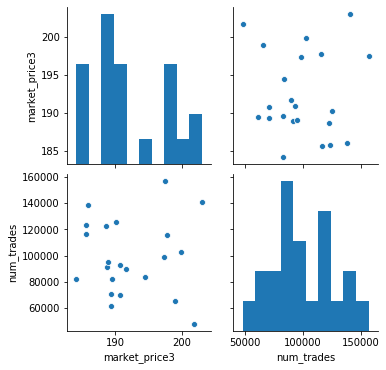

In [31]:
#ГРАФИК7
sns_plot = sns.pairplot(prices2_dynamics[['market_price3', 'num_trades']])
sns_plot

ГРАФИК7 аналогичен предыдущему, но по одной отдельной ценной бумаге. Помогает увидеть, что очевидной тенденции между ценой и количеством сделок не наблюдалось.

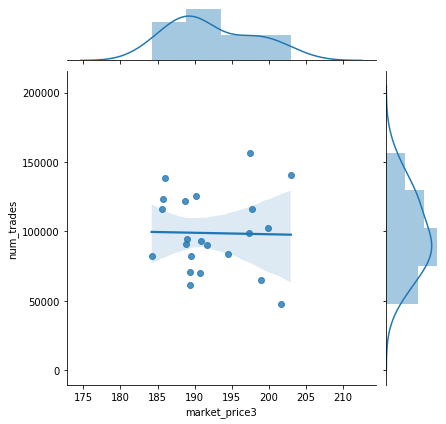

In [36]:
#ГРАФИК8
sns.jointplot(x='market_price3', y='num_trades', data=prices2_dynamics, kind='reg')

ГРАФИК8 аналогично показывает взаимосвязь между ценой и количеством сделок.
Тенденция на графике говорит о том, что между изучаемыми переменными взаимосвязи практически нет.

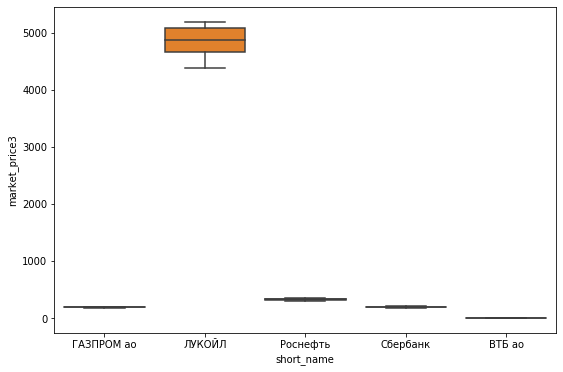

In [33]:
#ГРАФИК9
prices_security = data_new[['trade_date', 'short_name', 'market_price3', 'num_trades']]
group = prices_security[((prices_security['short_name']=='Сбербанк')| (prices_security['short_name']=='ГАЗПРОМ ао') | (prices_security['short_name']=='ЛУКОЙЛ') | (prices_security['short_name']=='Роснефть') | (prices_security['short_name']=='ВТБ ао'))]
ax = sns.boxplot(x='short_name', y='market_price3', data=group)

ГРАФИК9 из-за большой разницы в котировках ценных бумаг (зависят от номинальной стоимости) не подошел для анализа, пришлось выкинуть ценные бумаги с максимальным и минимальным разбросом котировок и построить график по трем ценным бумагам.

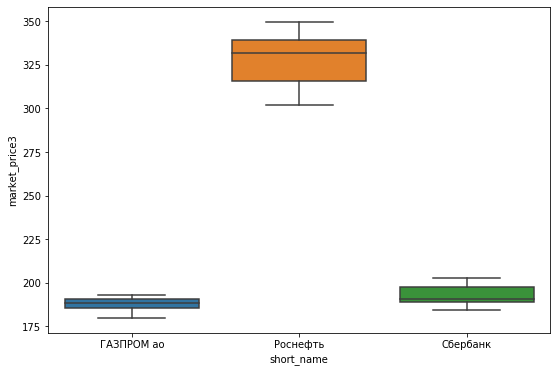

In [34]:
#ГРАФИК10
prices_security = data_new[['trade_date', 'short_name', 'market_price3', 'num_trades']]
group = prices_security[((prices_security['short_name']=='Сбербанк')| (prices_security['short_name']=='ГАЗПРОМ ао') | (prices_security['short_name']=='Роснефть'))]
ax = sns.boxplot(x='short_name', y='market_price3', data=group)

ГРАФИК10 показывает минимальную и максимальную рыночную цену по каждой ценной бумаге (усы ящика), какое значение цены превышало или было меньше в 50% случаев (медиана);
какое значение было у цены в 25% случаев (верхний и нижний квартили); выбросов по ценам не было.